In [210]:
require(ggplot2)
require(data.table)
require(Hmisc)
require(ggthemes)
require(gridExtra)
require(grid)
require(lattice)
require(scales)
require(RColorBrewer)
require(reshape)

In [211]:
# install.packages('reshape')

In [212]:
directory = "/mnt/sdc1/baseerat/numerical-evals/1-26-2018/logs-1M"
blues = brewer.pal(n = 6, "Blues")[4:6]
bluesLong = brewer.pal(n = 6, "Blues")[2:6]
plotTheme <- theme_hc() + theme(legend.title=element_blank(), 
                                legend.position="top", 
                                text=element_text(size=14))

In [213]:
blues

[1] "#6BAED6" "#3182BD" "#08519C"

In [96]:
groupSizePerGroupPerTenant <- fread(paste(directory, "group_size_per_group_per_tenant.csv", sep="/"), sep=",", 
                                    header=TRUE)
groupSizePerGroupPerTenant[groupSizeDist == "wve"]$groupSizeDist <- "Group sizes: WVE"
groupSizePerGroupPerTenant[groupSizeDist == "uniform"]$groupSizeDist <- "Group sizes: Uniform"

ERROR: Error in fread(paste(directory, "group_size_per_group_per_tenant.csv", : File '/mnt/sdc1/baseerat/numerical-evals/1-26-2018/logs-1M/group_size_per_group_per_tenant.csv' does not exist. Include one or more spaces to consider the input a system command.


In [97]:
plt <- ggplot(groupSizePerGroupPerTenant) +
   stat_ecdf(aes(x=groupSize, color="something"), size=1.1) +
   facet_grid(. ~ groupSizeDist) +
   ggtitle("") +
   xlab("Group Size Distributions") +
   ylab("ECDF") +
   scale_color_manual(values=blues) +
   plotTheme + theme(text=element_text(size=11), axis.text.x = element_text(angle = 45, hjust = 1),                                 
                     legend.position="none")
ggsave(plt, file="group_size_per_group_per_tenant.pdf", height=2, width=4)

ERROR: Error in ggplot(groupSizePerGroupPerTenant): object 'groupSizePerGroupPerTenant' not found


In [98]:
head(groupSizePerGroupPerTenant[groupSizeDist == "wve", quantile(groupSize,c(0.5,0.75,0.99))])

ERROR: Error in head(groupSizePerGroupPerTenant[groupSizeDist == "wve", quantile(groupSize, : object 'groupSizePerGroupPerTenant' not found


In [180]:
replaceFactors <- function(dt) {
    dt <- dt[placementNumHostsPerLeaf %in% c('uniform', '12')]
    dt[placementNumHostsPerLeaf == '12']$placementNumHostsPerLeaf <- "P=12"
    dt[placementNumHostsPerLeaf == 'uniform']$placementNumHostsPerLeaf <- "P=1"
    dt[groupSizeDist == "wve"]$groupSizeDist <- "WVE"
    dt[groupSizeDist == "uniform"]$groupSizeDist <- "Uniform"
    if("podsAlgorithm" %in% colnames(dt)) {
       dt <- dt[podsAlgorithm != "exact-match" & podsRedundancyPerBitmap <= 12 & podsNumBitmaps != 3]
    }
    if ("leafsAlgorithm" %in% colnames(dt)) {
       dt <- dt[leafsAlgorithm != "exact-match" & leafsRedundancyPerBitmap <= 12  & leafsNumBitmaps != 20]
    }
    return(dt)
}

rulesLabeller <- function(rules) {
    paste("F: ", rules, sep="")
}

format_si <- function(...) {
  # Format a vector of numeric values according
  # to the International System of Units.
  # http://en.wikipedia.org/wiki/SI_prefix
  #
  # Based on code by Ben Tupper
  # https://stat.ethz.ch/pipermail/r-help/2012-January/299804.html
  # Args:
  #   ...: Args passed to format()
  #
  # Returns:
  #   A function to format a vector of strings using
  #   SI prefix notation
  #
  
  function(x) {
    limits <- c(1e-24, 1e-21, 1e-18, 1e-15, 1e-12,
                1e-9,  1e-6,  1e-3,  1e0,   1e3,
                1e6,   1e9,   1e12,  1e15,  1e18,
                1e21,  1e24)
    prefix <- c("y",   "z",   "a",   "f",   "p",
                "n",   "µ",   "m",   " ",   "K",
                "M",   "G",   "T",   "P",   "E",
                "Z",   "Y")
  
    # Vector with array indices according to position in intervals
    i <- findInterval(abs(x), limits)
  
    # Set prefix to " " for very small values < 1e-24
    i <- ifelse(i==0, which(limits == 1e0), i)

    paste(format(round(x/limits[i], 1),
                 trim=TRUE, scientific=FALSE, ...),
          prefix[i], sep="")
  }
}

In [101]:
groupsCoveredWithBitmapsOnlyForPods <- replaceFactors(fread(paste(directory, 
                                                   "groups_covered_with_bitmaps_only_for_pods.csv", sep="/"), sep=",", 
                                             header=TRUE))


ERROR: Error in fread(paste(directory, "groups_covered_with_bitmaps_only_for_pods.csv", : File '/mnt/sdc1/baseerat/numerical-evals/1-26-2018/logs-1M/groups_covered_with_bitmaps_only_for_pods.csv' does not exist. Include one or more spaces to consider the input a system command.


In [86]:
head(groupsCoveredWithBitmapsOnlyForPods)

,groupsCovered,groupsCoveredWithoutDefaultBitmap,groupSizeDist,placementDist,placementNumHostsPerLeaf,seed,podsAlgorithm,podsNumBitmaps,podsNumNodesPerBitmap,podsRedundancyPerBitmap,podsNumRules
1,998466,998466,Group sizes: WVE,colocate-colocate-uniform,P=12,2,random-fuzzy-match,3,3,12,10000
2,977071,977071,Group sizes: Uniform,colocate-colocate-uniform,P=12,0,random-fuzzy-match,1,3,0,10000
3,977071,977071,Group sizes: Uniform,colocate-colocate-uniform,P=12,0,random-fuzzy-match,1,3,0,64000
4,978869,978869,Group sizes: Uniform,colocate-colocate-uniform,P=12,0,random-fuzzy-match,1,3,12,10000
5,978869,978869,Group sizes: Uniform,colocate-colocate-uniform,P=12,0,random-fuzzy-match,1,3,12,64000
6,977473,977473,Group sizes: Uniform,colocate-colocate-uniform,P=12,0,random-fuzzy-match,1,3,6,10000


In [143]:
p1 <- ggplot(groupsCoveredWithBitmapsOnlyForPods[podsNumRules == 10000], aes(y=groupsCoveredWithoutDefaultBitmap, x=factor(podsNumBitmaps), 
                fill=interaction(podsRedundancyPerBitmap))) +
   stat_summary(fun.data=mean_sdl, geom="bar",position=position_dodge(width=0.8), width=0.8, col="black") +
   stat_summary(fun.data=mean_sdl, geom="errorbar",position=position_dodge(width=0.8), width=0.2) +
   facet_grid(factor(placementNumHostsPerLeaf) ~ groupSizeDist) +
   xlab("Number of pod bitmaps") +
   ylab("Groups covered with p-rules") +
   scale_fill_manual(values=blues, name="Redundancy") +
   plotTheme + theme(legend.title=element_text(size=12)) +
   scale_y_continuous(labels=format_si())
ggsave(p1, file="groups_covered_with_bitmaps_only_for_pods.pdf",  height=4.5, width=4)

In [144]:
groupsCoveredWithBitmapsOnlyForLeafs <- replaceFactors(fread(paste(directory, 
                                                   "groups_covered_with_bitmaps_only_for_leafs.csv", sep="/"), sep=",", 
                                             header=TRUE))

In [145]:
p2 <- ggplot(groupsCoveredWithBitmapsOnlyForLeafs[leafsNumRules == 10000], 
             aes(y=groupsCoveredWithoutDefaultBitmap, x=factor(leafsNumBitmaps), 
                fill=interaction(leafsRedundancyPerBitmap))) +
   stat_summary(fun.data=mean_sdl, geom="bar",position=position_dodge(width=0.8), width=0.8, col="black") +
   stat_summary(fun.data=mean_sdl, geom="errorbar",position=position_dodge(width=0.8), width=0.2) +
   facet_grid(factor(placementNumHostsPerLeaf) ~ groupSizeDist) +
   xlab("Number of leaf bitmaps") +
   ylab("Groups covered  with p-rules") +
   scale_fill_manual(values=blues, name="Redundancy") +
   scale_y_continuous(labels=format_si()) +
   plotTheme + theme(legend.title=element_text(size=12))
ggsave(p2, file="groups_covered_with_bitmaps_only_for_leafs.pdf",  height=4.5, width=4)

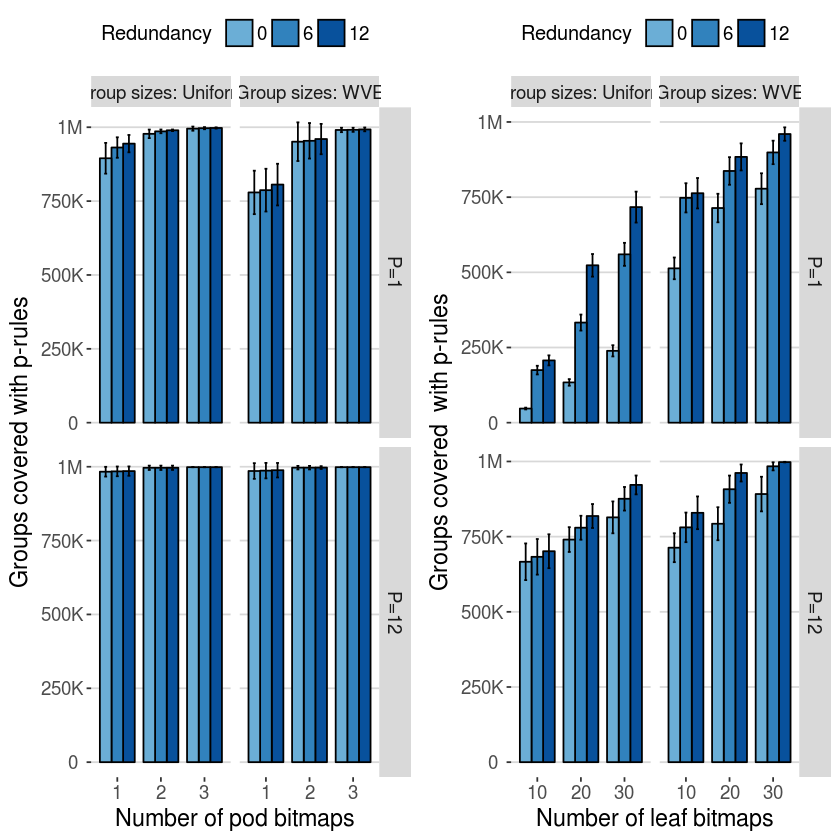

In [146]:
combined <- grid.arrange(p1, p2, ncol=2)
ggsave(combined, height=3.5, width=8, file="groups_covered_with_bitmaps_only_all.pdf")

In [91]:
ruleCountForPods <- replaceFactors(fread(paste(directory, "rule_count_for_pods.csv", sep="/"), sep=",", header=TRUE))

In [131]:
plt <- ggplot(ruleCountForPods) +
    geom_boxplot(aes(y=numRules, x=factor(podsNumBitmaps), 
                     fill=interaction(podsRedundancyPerBitmap)),
                 outlier.size=0.5) +
    facet_grid(factor(placementNumHostsPerLeaf)~ groupSizeDist * podsNumRules, 
               labeller = labeller(podsNumRules = rulesLabeller)) +
    xlab("Number of bitmaps") +
    ylab("Number of rules") +
    scale_fill_manual(values=blues, name="Redundancy") +
    scale_y_continuous(labels=format_si()) +
    plotTheme + theme(legend.title=element_text(size=12))
ggsave(plt, file="rule_count_for_pods.pdf",  height=3.5, width=7)

In [132]:
median(ruleCountForPods[placementNumHostsPerLeaf == "P=12" & podsNumBitmaps == 2]$numRules)

[1] 0

In [133]:
ruleCountForLeafs <- replaceFactors(fread(paste(directory, "rule_count_for_leafs.csv", sep="/"), sep=",", header=TRUE))

In [134]:
plt <- ggplot(ruleCountForLeafs) +
    geom_boxplot(aes(y=numRules, x=factor(leafsNumBitmaps), 
                     fill=interaction(leafsRedundancyPerBitmap)),
                 outlier.size=0.5) +
    facet_grid(factor(placementNumHostsPerLeaf) ~ groupSizeDist * leafsNumRules, 
               labeller = labeller(leafsNumRules = rulesLabeller)) +
    xlab("Number of bitmaps") +
    ylab("Number of rules") +
    scale_fill_manual(values=blues, name="Redundancy") +
    scale_y_continuous(labels=format_si()) +
    plotTheme + theme(legend.title=element_text(size=12))
ggsave(plt, file="rule_count_for_leafs.pdf", height=3.5, width=7)

In [181]:
trafficPerGroupPerTenant <- replaceFactors(fread(paste(directory, "traffic_per_group_per_tenant.csv", sep="/"), sep=",", 
                                  header=TRUE))
trafficPerGroupPerTenant$unicastTraffic <- as.numeric(trafficPerGroupPerTenant$unicastTraffic)
trafficPerGroupPerTenant$multicastTraffic <- as.numeric(trafficPerGroupPerTenant$multicastTraffic)
trafficPerGroupPerTenant$baseeratTraffic <- as.numeric(trafficPerGroupPerTenant$baseeratTraffic)
trafficPerGroupPerTenant$overlayTraffic <- as.numeric(trafficPerGroupPerTenant$overlayTraffic)
trafficPerGroupPerTenant$overlayTrafficCorrected <- as.numeric(trafficPerGroupPerTenant$overlayTrafficCorrected)

trafficPerGroupPerTenant$unicastTraffic1500B <- as.numeric(trafficPerGroupPerTenant$unicastTraffic1500B)
trafficPerGroupPerTenant$multicastTraffic1500B <- as.numeric(trafficPerGroupPerTenant$multicastTraffic1500B)
trafficPerGroupPerTenant$baseeratTraffic1500B <- as.numeric(trafficPerGroupPerTenant$baseeratTraffic1500B)
trafficPerGroupPerTenant$overlayTraffic1500B <- as.numeric(trafficPerGroupPerTenant$overlayTraffic1500B)
trafficPerGroupPerTenant$overlayTrafficCorrected1500B <- as.numeric(trafficPerGroupPerTenant$overlayTrafficCorrected1500B)


In [205]:
trafficMelted <- melt(trafficPerGroupPerTenant, id=c("groupSizeDist", "placementDist", "placementNumHostsPerLeaf", "seed",
                                    "podsAlgorithm", "podsNumBitmaps", "podsNumNodesPerBitmap",
                                    "podsRedundancyPerBitmap", "podsNumRules", "leafsAlgorithm",
                                    "leafsNumBitmaps", "leafsNumNodesPerBitmap", "leafsRedundancyPerBitmap",
                                    "leafsNumRules", "multicastTraffic", "multicastTraffic1500B"))

trafficMelted64 <- melt(trafficPerGroupPerTenant, id=c("groupSizeDist", "placementDist", "placementNumHostsPerLeaf", "seed",
                                    "podsAlgorithm", "podsNumBitmaps", "podsNumNodesPerBitmap",
                                    "podsRedundancyPerBitmap", "podsNumRules", "leafsAlgorithm",
                                    "leafsNumBitmaps", "leafsNumNodesPerBitmap", "leafsRedundancyPerBitmap",
                                    "leafsNumRules", "multicastTraffic", "multicastTraffic64B"))

In [183]:
unique(blah$variable)

[1] unicastTraffic1500B          baseeratTraffic1500B        
[3] overlayTrafficCorrected1500B
17 Levels: unicastTraffic baseeratTraffic ... Baseerat

In [207]:
trafficMelted <- trafficMelted[!(variable == "unicastTraffic" & leafsRedundancyPerBitmap > 0)]
trafficMelted <- trafficMelted[!(variable == "overlayTraffic")]
trafficMelted <- trafficMelted[!(variable == "overlayTrafficCorrected" & leafsRedundancyPerBitmap > 0)]
trafficMelted[variable == "baseeratTraffic"]$variable <- "Baseerat"
trafficMelted$redundancyAndAlgo <- interaction(trafficMelted$variable, 
                                               trafficMelted$leafsRedundancyPerBitmap, sep=":R=")
trafficMelted[redundancyAndAlgo == "unicastTraffic:R=0"]$redundancyAndAlgo <- "Unicast"

trafficMelted64 <- trafficMelted64[!(variable == "unicastTraffic" & leafsRedundancyPerBitmap > 0)]
trafficMelted64 <- trafficMelted64[!(variable == "overlayTraffic")]
trafficMelted64 <- trafficMelted64[!(variable == "overlayTrafficCorrected" & leafsRedundancyPerBitmap > 0)]
trafficMelted64[variable == "baseeratTraffic"]$variable <- "Baseerat"
trafficMelted64$redundancyAndAlgo <- interaction(trafficMelted64$variable, 
                                               trafficMelted64$leafsRedundancyPerBitmap, sep=":R=")
trafficMelted64[redundancyAndAlgo == "unicastTraffic:R=0"]$redundancyAndAlgo <- "Unicast"

In [208]:
blah <- trafficMelted[(redundancyAndAlgo == "overlayTrafficCorrected1500B:R=0" | 
                       redundancyAndAlgo ==  "baseeratTraffic1500B:R=0" |
                       redundancyAndAlgo == "baseeratTraffic1500B:R=6" | 
                       redundancyAndAlgo == "baseeratTraffic1500B:R=12" |
                       redundancyAndAlgo == "unicastTraffic1500B:R=0")]
blah[redundancyAndAlgo == "baseeratTraffic1500B:R=0"]$redundancyAndAlgo <- "Baseerat:R=0"
blah[redundancyAndAlgo == "baseeratTraffic1500B:R=6"]$redundancyAndAlgo <- "Baseerat:R=6"
blah[redundancyAndAlgo == "baseeratTraffic1500B:R=12"]$redundancyAndAlgo <- "Baseerat:R=12"
blah[redundancyAndAlgo == "overlayTrafficCorrected1500B:R=0"]$redundancyAndAlgo <- "Overlay Multicast"
blah[redundancyAndAlgo == "unicastTraffic1500B:R=0"]$redundancyAndAlgo <- "Unicast"

blah64 <- trafficMelted64[(redundancyAndAlgo == "overlayTrafficCorrected64B:R=0" | 
                       redundancyAndAlgo ==  "baseeratTraffic64B:R=0" |
                       redundancyAndAlgo == "baseeratTraffic64B:R=6" | 
                       redundancyAndAlgo == "baseeratTraffic64B:R=12" |
                       redundancyAndAlgo == "unicastTraffic64B:R=0")]
blah64[redundancyAndAlgo == "baseeratTraffic64B:R=0"]$redundancyAndAlgo <- "Baseerat:R=0"
blah64[redundancyAndAlgo == "baseeratTraffic64B:R=6"]$redundancyAndAlgo <- "Baseerat:R=6"
blah64[redundancyAndAlgo == "baseeratTraffic64B:R=12"]$redundancyAndAlgo <- "Baseerat:R=12"
blah64[redundancyAndAlgo == "overlayTrafficCorrected64B:R=0"]$redundancyAndAlgo <- "Overlay Multicast"
blah64[redundancyAndAlgo == "unicastTraffic64B:R=0"]$redundancyAndAlgo <- "Unicast"

In [186]:
blah[redundancyAndAlgo == "Unicast"]$value


[1] 3.697164e+12 3.697164e+12 3.697164e+12 3.697164e+12 5.521509e+12
 [6] 5.521509e+12 5.521509e+12 5.521509e+12 4.475555e+11 4.475555e+11
[11] 4.475555e+11 4.475555e+11 5.552096e+11 5.552096e+11 5.552096e+11
[16] 5.552096e+11 3.082091e+12 3.082091e+12 3.082091e+12 3.082091e+12
[21] 4.302154e+12 4.302154e+12 4.302154e+12 4.302154e+12 3.676229e+11
[26] 3.676229e+11 3.676229e+11 3.676229e+11 4.392588e+11 4.392588e+11
[31] 4.392588e+11 4.392588e+11 3.668306e+12 3.668306e+12 3.668306e+12
[36] 3.668306e+12 5.433776e+12 5.433776e+12 5.433776e+12 5.433776e+12
[41] 4.360266e+11 4.360266e+11 4.360266e+11 4.360266e+11 5.240786e+11
[46] 5.240786e+11 5.240786e+11 5.240786e+11

In [187]:
range(trafficMelted[redundancyAndAlgo == "Overlay Multicast" & leafsNumBitmaps == 30, value/multicastTraffic])

Warning message in min(x):
“no non-missing arguments to min; returning Inf”Warning message in max(x):
“no non-missing arguments to max; returning -Inf”

[1]  Inf -Inf

In [188]:
moreColors <- c('beige', 'orange3', '#6BAED6', '#3182BD', '#08519C')

In [189]:
plt <- ggplot(trafficMelted, 
       aes(y=value/multicastTraffic, x=factor(leafsNumBitmaps), 
           fill=factor(redundancyAndAlgo, 
                       levels=c("Unicast", "Overlay Multicast", "Baseerat:R=0", "Baseerat:R=6", "Baseerat:R=12", "Baseerat:R=24", 
                                "Baseerat:R=48")))) +
    stat_summary(fun.data = mean_sdl, geom = "bar", position=position_dodge(0.8), width=0.8, col="black") +
    stat_summary(fun.data = mean_sdl, geom = "errorbar", position=position_dodge(0.8), width=0.2) +
    facet_grid(factor(placementNumHostsPerLeaf) ~ groupSizeDist * leafsNumRules, 
               labeller = labeller(leafsNumRules = rulesLabeller)) +
    xlab("Number of bitmaps") +
    ylab("Traffic Overhead\n(ratio with ideal multicast)") +
    scale_fill_manual(values=moreColors, name="Algorithm") +
# scale_fill_brewer(palette="OrRd", name="Algorithm") +
   scale_y_continuous(labels=format_si()) +
   plotTheme + theme(legend.title=element_text(size=12))
ggsave(plt, file="all_traffic_overhead_per_group_per_tenant.pdf", height=3.5, width=7)

Warning message:
“Removed 144 rows containing non-finite values (stat_summary).”Warning message:
“Removed 144 rows containing non-finite values (stat_summary).”

In [190]:
moreColors <- c('#6BAED6', '#3182BD', '#08519C')
unicastAndMulticast <- blah[redundancyAndAlgo=="Unicast" | redundancyAndAlgo == "Overlay Multicast",
                        mean(value/multicastTraffic1500B), by=list(redundancyAndAlgo, 
                                                                   placementNumHostsPerLeaf,
                                                                  groupSizeDist, leafsNumRules)]

In [209]:
mean(blah[redundancyAndAlgo != "Unicast" & redundancyAndAlgo != "Overlay Multicast" &
    redundancyAndAlgo == "Baseerat:R=12" & leafsNumBitmaps == 30 & placementNumHostsPerLeaf == "P=12" &
    groupSizeDist == "WVE" & leafsNumRules == 10000, value/multicastTraffic1500B])

mean(blah64[redundancyAndAlgo != "Unicast" & redundancyAndAlgo != "Overlay Multicast" &
    redundancyAndAlgo == "Baseerat:R=12" & leafsNumBitmaps == 30 & placementNumHostsPerLeaf == "P=12" &
    groupSizeDist == "WVE" & leafsNumRules == 10000, value/multicastTraffic64B])

[1] 1.058828

[1] 1.340107

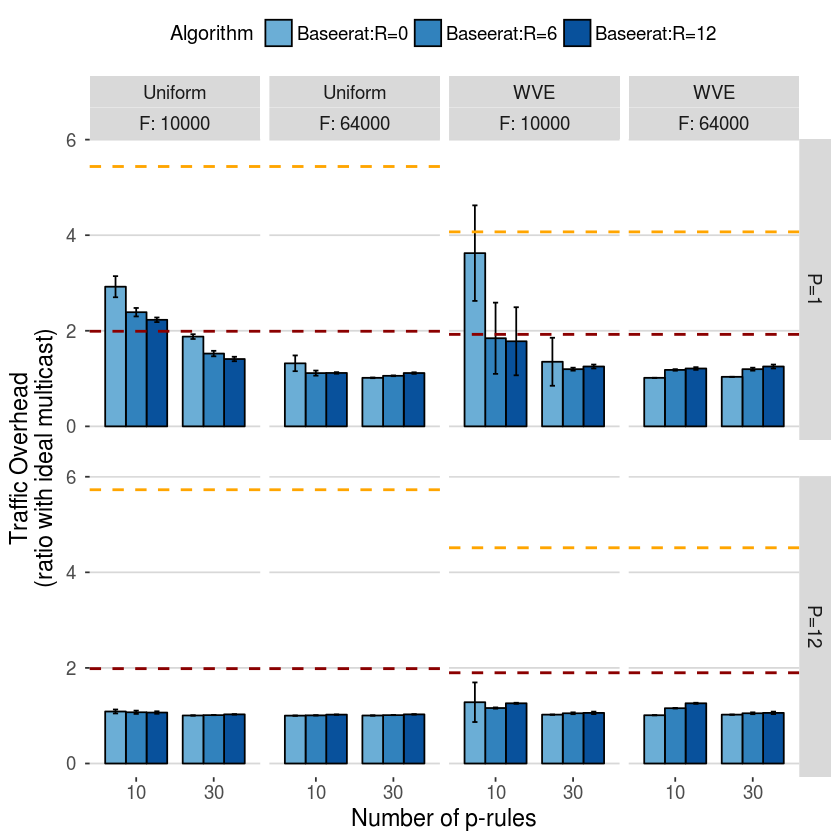

In [191]:
plt <- ggplot(blah[redundancyAndAlgo != "Unicast" & redundancyAndAlgo != "Overlay Multicast"], 
       aes(y=value/multicastTraffic1500B, x=factor(leafsNumBitmaps), 
           fill=factor(redundancyAndAlgo, 
                       levels=c("Unicast", "Overlay Multicast", "Baseerat:R=0", "Baseerat:R=6", "Baseerat:R=12", "Baseerat:R=24", 
                                "Baseerat:R=48")))) +
    stat_summary(fun.data = mean_sdl, geom = "bar", position=position_dodge(0.8), width=0.8, col="black") +
    stat_summary(fun.data = mean_sdl, geom = "errorbar", position=position_dodge(0.8), width=0.2) +
    geom_hline(data=unicastAndMulticast[redundancyAndAlgo == "Unicast" ], 
               aes(yintercept=V1), linetype="dashed", col='orange', size=0.8) +
    geom_hline(data=unicastAndMulticast[redundancyAndAlgo == "Overlay Multicast" ], 
               aes(yintercept=V1), linetype="dashed", col='darkred', size=0.8) +
    facet_grid(factor(placementNumHostsPerLeaf) ~ groupSizeDist * leafsNumRules, 
               labeller = labeller(leafsNumRules = rulesLabeller)) +
    xlab("Number of p-rules") +
    ylab("Traffic Overhead\n(ratio with ideal multicast)") +
    scale_fill_manual(values=moreColors, name="Algorithm") +
   scale_y_continuous(labels=format_si()) +
   plotTheme + theme(legend.title=element_text(size=12), panel.spacing.y=unit(1.5, "lines"))
ggsave(plt, file="all_traffic_overhead_per_group_per_tenant_bytes.pdf", height=3.5, width=7)
plt

In [177]:
plt <- ggplot(trafficMelted, 
       aes(y=value/multicastTraffic, x=factor(leafsNumBitmaps), 
           fill=factor(redundancyAndAlgo, 
                       levels=c("Unicast", "Overlay Multicast", "Baseerat:R=0", "Baseerat:R=6", "Baseerat:R=12", "Baseerat:R=24", 
                                "Baseerat:R=48")))) +
    stat_summary(fun.data = mean_sdl, geom = "bar", position=position_dodge(0.8), width=0.8, col="black") +
    stat_summary(fun.data = mean_sdl, geom = "errorbar", position=position_dodge(0.8), width=0.2) +
    facet_grid(factor(placementNumHostsPerLeaf) ~ groupSizeDist * leafsNumRules, 
               labeller = labeller(leafsNumRules = rulesLabeller)) +
    xlab("Number of bitmaps") +
    ylab("Traffic Overhead\n(ratio with ideal multicast)") +
    scale_fill_manual(values=moreColors, name="Algorithm") +
# scale_fill_brewer(palette="OrRd", name="Algorithm") +
   scale_y_continuous(labels=format_si()) +
   plotTheme + theme(legend.title=element_text(size=12))
ggsave(plt, file="all_traffic_overhead_per_group_per_tenant.pdf", height=3.5, width=7)

Warning message:
“Removed 144 rows containing non-finite values (stat_summary).”Warning message:
“Removed 144 rows containing non-finite values (stat_summary).”

ERROR: Error: Insufficient values in manual scale. 4 needed but only 3 provided.


In [101]:
plt <- ggplot(trafficPerGroupPerTenant, 
       aes(y=unicastTraffic/multicastTraffic, x=factor(leafsNumBitmaps), 
           fill=interaction(leafsAlgorithm, leafsNumNodesPerBitmap, leafsRedundancyPerBitmap))) +
    stat_summary(fun.y = mean, geom = "bar", position=position_dodge(0.5), width=0.5) +
    stat_summary(fun.y = mean, geom = "bar", position=position_dodge(0.5), width=0.5) +
    facet_grid(groupSizeDist * leafsNumRules ~ factor(placementNumHostsPerLeaf, 
                                                      levels=c('uniform','12','24','48'))) +
    ylim(c(0, 6)) +
    xlab("Number of bitmaps") +
    ylab("Unicast-to-Multicast Traffic Overhead") +
    plotTheme
ggsave(plt, file="unicast_traffic_overhead_per_group_per_tenant.pdf", height=5, width=7)

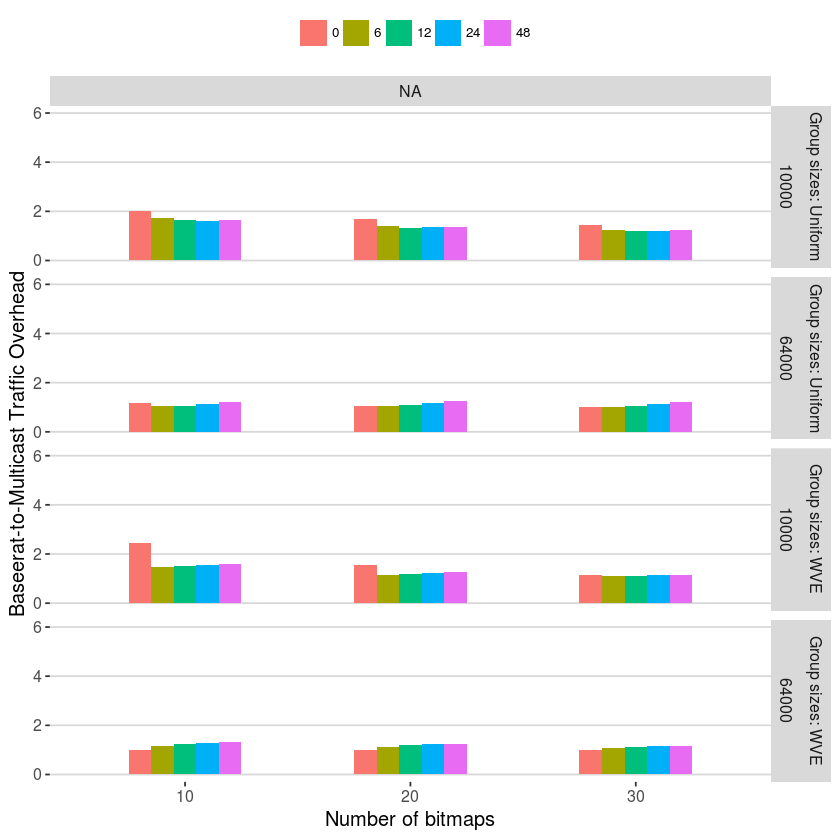

In [295]:
plt <- ggplot(trafficPerGroupPerTenant, 
       aes(y=baseeratTraffic/multicastTraffic, x=factor(leafsNumBitmaps), 
           fill=interaction(leafsAlgorithm, leafsNumNodesPerBitmap, leafsRedundancyPerBitmap))) +
    stat_summary(fun.y = mean, geom = "bar", position=position_dodge(0.5), width=0.5) +
    facet_grid(groupSizeDist * leafsNumRules ~ factor(placementNumHostsPerLeaf, 
                                                      levels=c('uniform','12','24','48'))) +
    ylim(c(0, 6)) +
    xlab("Number of bitmaps") +
    ylab("Baseerat-to-Multicast Traffic Overhead") +
    plotTheme
ggsave(plt, file="baseerat_traffic_overhead_per_group_per_tenant.pdf", height=5, width=7)

In [251]:
plt <- ggplot(trafficPerGroupPerTenant, 
       aes(y=overlayTraffic/multicastTraffic, x=factor(leafsNumBitmaps), 
           fill=interaction(leafsAlgorithm, leafsNumNodesPerBitmap, leafsRedundancyPerBitmap))) +
    stat_summary(fun.y = mean, geom = "bar", position=position_dodge(0.5), width=0.5) +
    facet_grid(groupSizeDist * leafsNumRules ~ factor(placementNumHostsPerLeaf, 
                                                      levels=c('uniform','12','24','48'))) +
    ylim(c(0, 6)) +
    xlab("Number of bitmaps") +
    ylab("Overlay-to-Multicast Traffic Overhead") +
    plotTheme
ggsave(plt, file="overlay_traffic_overhead_per_group_per_tenant.pdf", height=5, width=7)

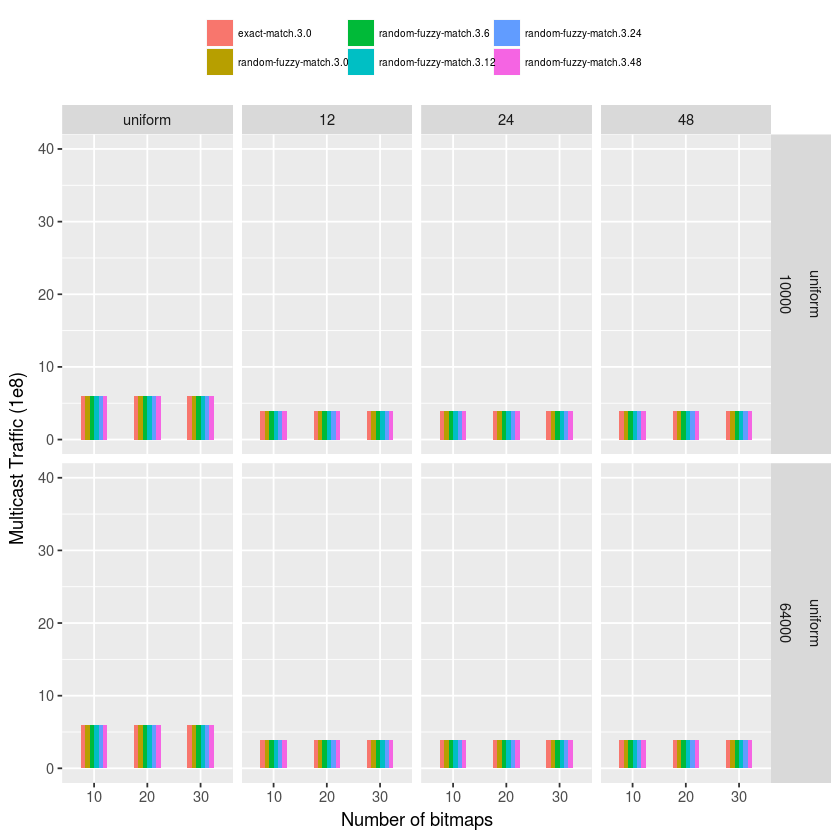

In [24]:
ggplot(trafficPerGroupPerTenant[groupSizeDist == "uniform"], 
       aes(y=multicastTraffic/1e8, x=factor(leafsNumBitmaps), 
           fill=interaction(leafsAlgorithm, leafsNumNodesPerBitmap, leafsRedundancyPerBitmap))) +
    stat_summary(fun.y = mean, geom = "bar", position=position_dodge(0.5), width=0.5) +
    facet_grid(groupSizeDist * leafsNumRules ~ factor(placementNumHostsPerLeaf, 
                                                      levels=c('uniform','12','24','48'))) +
    ylim(c(0, 40)) +
    xlab("Number of bitmaps") +
    ylab("Multicast Traffic (1e8)") +
    plotTheme

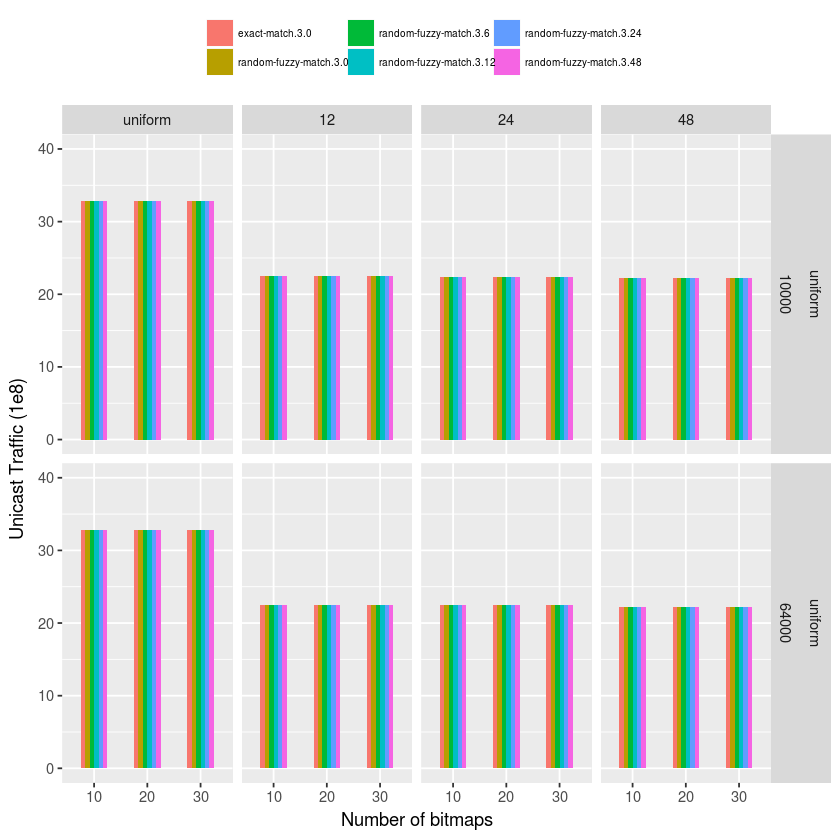

In [25]:
ggplot(trafficPerGroupPerTenant[groupSizeDist == "uniform"], 
       aes(y=unicastTraffic/1e8, x=factor(leafsNumBitmaps), 
           fill=interaction(leafsAlgorithm, leafsNumNodesPerBitmap, leafsRedundancyPerBitmap))) +
    stat_summary(fun.y = mean, geom = "bar", position=position_dodge(0.5), width=0.5) +
    facet_grid(groupSizeDist * leafsNumRules ~ factor(placementNumHostsPerLeaf, 
                                                      levels=c('uniform','12','24','48'))) +
    ylim(c(0, 40)) +
    xlab("Number of bitmaps") +
    ylab("Unicast Traffic (1e8)") +
    plotTheme

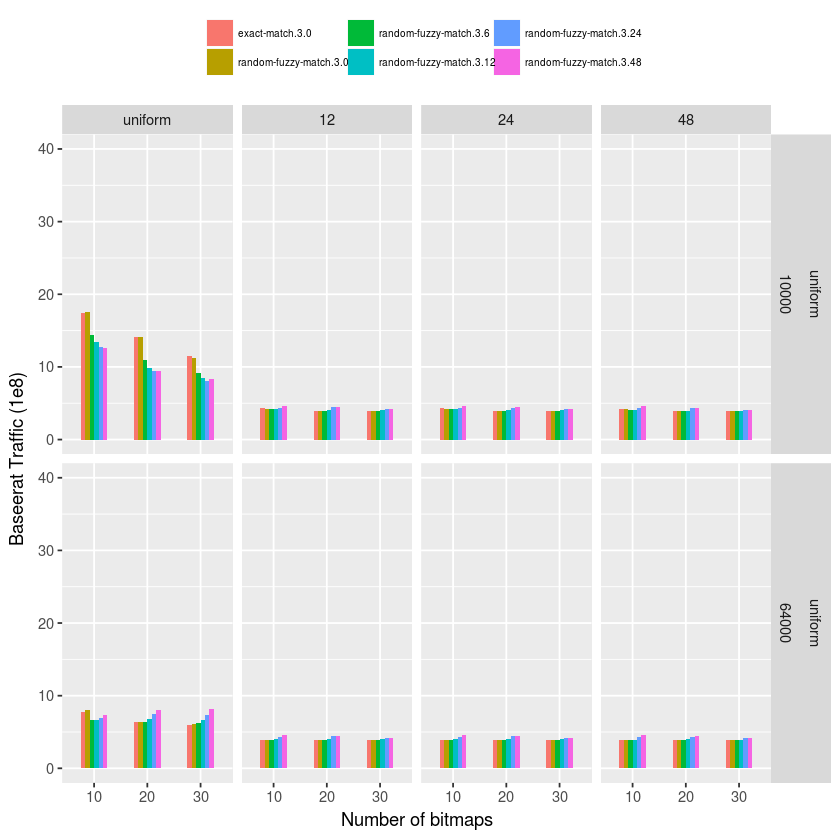

In [26]:
ggplot(trafficPerGroupPerTenant[groupSizeDist == "uniform"], 
       aes(y=baseeratTraffic/1e8, x=factor(leafsNumBitmaps), 
           fill=interaction(leafsAlgorithm, leafsNumNodesPerBitmap, leafsRedundancyPerBitmap))) +
    stat_summary(fun.y = mean, geom = "bar", position=position_dodge(0.5), width=0.5) +
    facet_grid(groupSizeDist * leafsNumRules ~ factor(placementNumHostsPerLeaf, 
                                                      levels=c('uniform','12','24','48'))) +
    ylim(c(0, 40)) +
    xlab("Number of bitmaps") +
    ylab("Baseerat Traffic (1e8)") +
    plotTheme

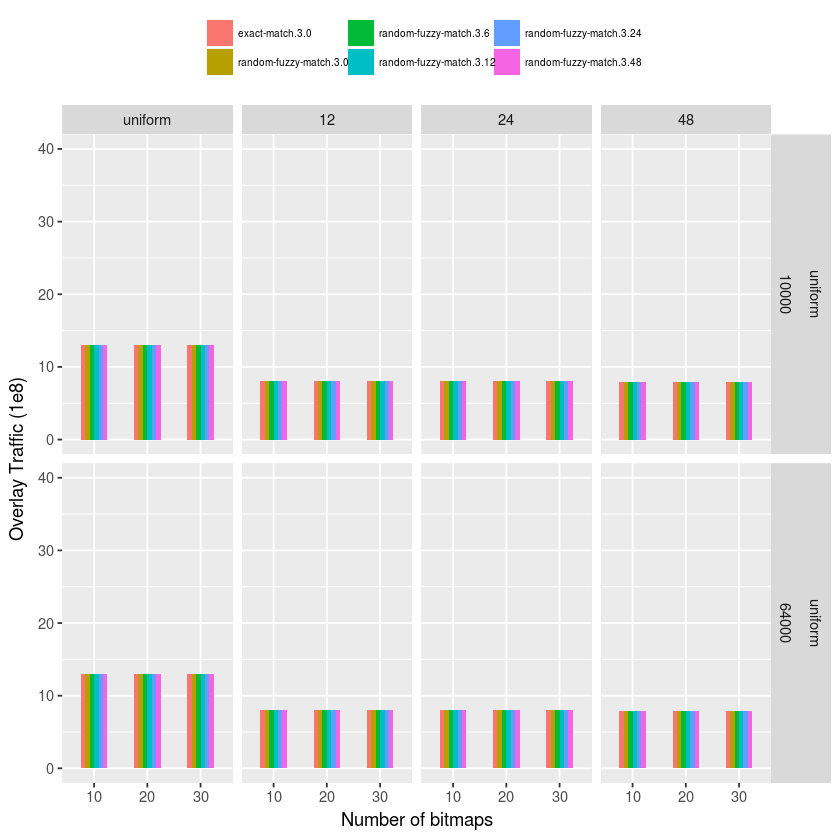

In [27]:
ggplot(trafficPerGroupPerTenant[groupSizeDist == "uniform"], 
       aes(y=overlayTraffic/1e8, x=factor(leafsNumBitmaps), 
           fill=interaction(leafsAlgorithm, leafsNumNodesPerBitmap, leafsRedundancyPerBitmap))) +
    stat_summary(fun.y = mean, geom = "bar", position=position_dodge(0.5), width=0.5) +
    facet_grid(groupSizeDist * leafsNumRules ~ factor(placementNumHostsPerLeaf, 
                                                      levels=c('uniform','12','24','48'))) +
    ylim(c(0, 40)) +
    xlab("Number of bitmaps") +
    ylab("Overlay Traffic (1e8)") +
    plotTheme

In [9]:
podsAlgorithmElapseTime <- replaceFactors(fread(paste(directory, "pods_algorithm_elapse_time_trim.csv", sep="/"), sep=",", header=TRUE))

Read 18057016 rows and 10 (of 10) columns from 1.460 GB file in 00:00:25


In [15]:
head(podsAlgorithmElapseTime)

,elapseTime,groupSizeDist,placementDist,placementNumHostsPerLeaf,seed,podsAlgorithm,podsNumBitmaps,podsNumNodesPerBitmap,podsRedundancyPerBitmap,podsNumRules
1,1.73430889844894e-05,Group sizes: Uniform,colocate-uniform,P=1,0,random-fuzzy-match,1,3,12,64000
2,4.59514558315277e-06,Group sizes: Uniform,colocate-uniform,P=1,0,random-fuzzy-match,1,3,12,64000
3,2.98814848065376e-06,Group sizes: Uniform,colocate-uniform,P=1,0,random-fuzzy-match,1,3,12,64000
4,3.81330028176308e-06,Group sizes: Uniform,colocate-uniform,P=1,0,random-fuzzy-match,1,3,12,64000
5,2.52807512879372e-06,Group sizes: Uniform,colocate-uniform,P=1,0,random-fuzzy-match,1,3,12,64000
6,1.4167744666338e-05,Group sizes: Uniform,colocate-uniform,P=1,0,random-fuzzy-match,1,3,12,64000


In [18]:
p1 <- ggplot(podsAlgorithmElapseTime[podsNumBitmaps == 2], 
       aes(y=elapseTime, x=factor(podsNumBitmaps), 
           fill=interaction(podsRedundancyPerBitmap))) +
    stat_summary(fun.y = mean, geom = "bar", position=position_dodge(0.5), width=0.5) +
    facet_grid(groupSizeDist * podsNumRules ~ factor(placementNumHostsPerLeaf)) +
    xlab("Number of bitmaps") +
    ylab("Processing time (us)") +
    plotTheme

In [ ]:
p1

In [ ]:
ggsave(p1)

In [4]:
leafsAlgorithmElapseTime <- fread(paste(directory, "leafs_algorithm_elapse_time_trim.csv", sep="/"), sep=",", header=TRUE)

Read 71892000 rows and 16 (of 16) columns from 8.306 GB file in 00:02:14


In [5]:
head(leafsAlgorithmElapseTime)

,elapseTime,groupSizeDist,placementDist,placementNumHostsPerLeaf,seed,podsAlgorithm,podsNumBitmaps,podsNumNodesPerBitmap,podsRedundancyPerBitmap,podsNumRules,leafsAlgorithm,leafsNumBitmaps,leafsNumNodesPerBitmap,leafsRedundancyPerBitmap,leafsNumRules,groupSize
1,1.7769169062376e-05,uniform,colocate-colocate-uniform,12,0,random-fuzzy-match,2,3,6,64000,random-fuzzy-match,30,3,0,10000,103
2,4.32739034295082e-06,uniform,colocate-colocate-uniform,12,0,random-fuzzy-match,2,3,6,64000,random-fuzzy-match,30,3,0,10000,107
3,4.2058527469635e-06,uniform,colocate-colocate-uniform,12,0,random-fuzzy-match,2,3,6,64000,random-fuzzy-match,30,3,0,10000,91
4,2.94996425509453e-06,uniform,colocate-colocate-uniform,12,0,random-fuzzy-match,2,3,6,64000,random-fuzzy-match,30,3,0,10000,124
5,2.69291922450066e-06,uniform,colocate-colocate-uniform,12,0,random-fuzzy-match,2,3,6,64000,random-fuzzy-match,30,3,0,10000,29
6,4.41493466496468e-06,uniform,colocate-colocate-uniform,12,0,random-fuzzy-match,2,3,6,64000,random-fuzzy-match,30,3,0,10000,176


In [7]:
leafsAlgorithmElapseTime <- unique(leafsAlgorithmElapseTime$placementNumHostsPerLeaf)

[1] "12"      "uniform"